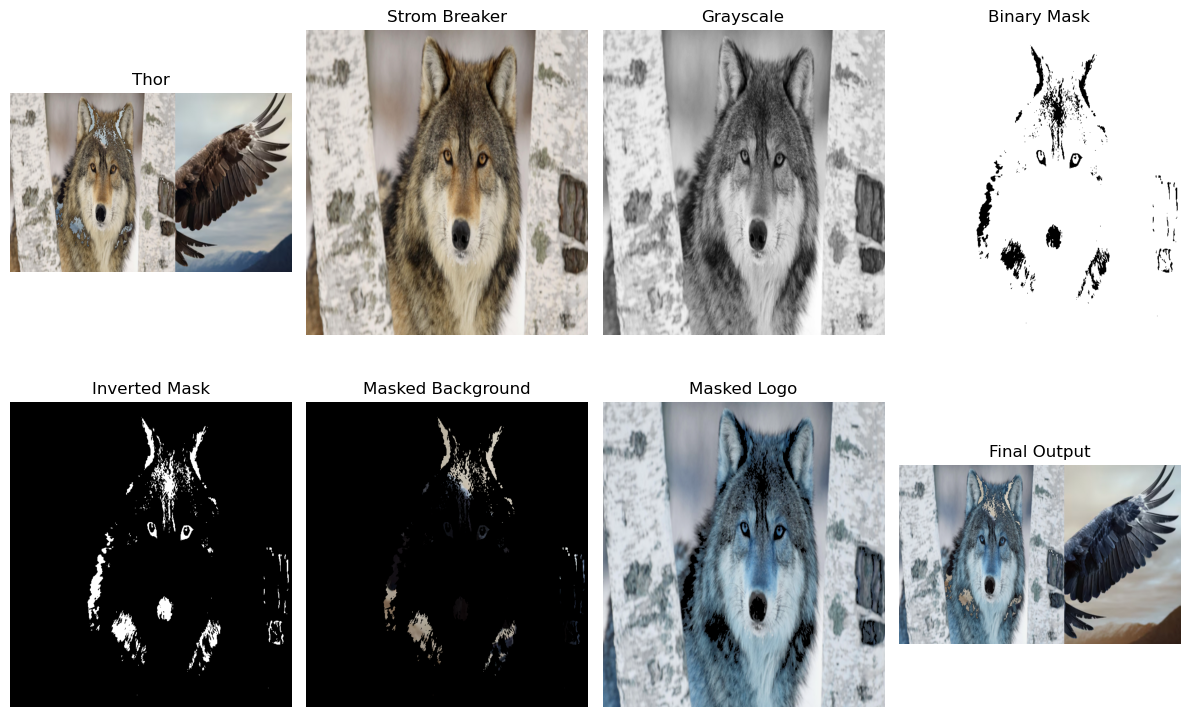

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two images
img1 = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
img2 = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\wolfss.png")

img1 = cv2.resize(img1, (1024, 650))
img2 = cv2.resize(img2, (600, 650))

# I want to fix img2 data into img1
r, c, ch = img2.shape
# Define the region of interest (ROI) in img1
roi = img1[0:r, 0:c]

# Create a grayscale mask from img2
img_gry = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Create a binary mask using threshold
_, mask = cv2.threshold(img_gry, 50, 255, cv2.THRESH_BINARY)
# Invert the mask to get the background
mask_inv = cv2.bitwise_not(mask)

# Apply the mask to the ROI in img1
img1_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)

# Take only the region of the logo from img2
img2_fg = cv2.bitwise_and(img2, img2, mask=mask)

# Combine the masked regions to create the final image
res = cv2.add(img1_bg, img2_fg)

final = img1
final[0:r, 0:c] = res  # Final output

# Display images using Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Thor")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Strom Breaker")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(img_gry, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(mask, cmap="gray")
plt.title("Binary Mask")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(mask_inv, cmap="gray")
plt.title("Inverted Mask")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(img1_bg, cmap="gray")
plt.title("Masked Background")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(img2_fg, cmap="gray")
plt.title("Masked Logo")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(final, cmap="gray")
plt.title("Final Output")
plt.axis("off")

plt.tight_layout()
plt.show()